In [1]:
from numpy import load
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from scipy import signal
import typing

In [2]:
data = load('data_ps1.npz')
data

NpzFile 'data_ps1.npz' with keys: environment, rod

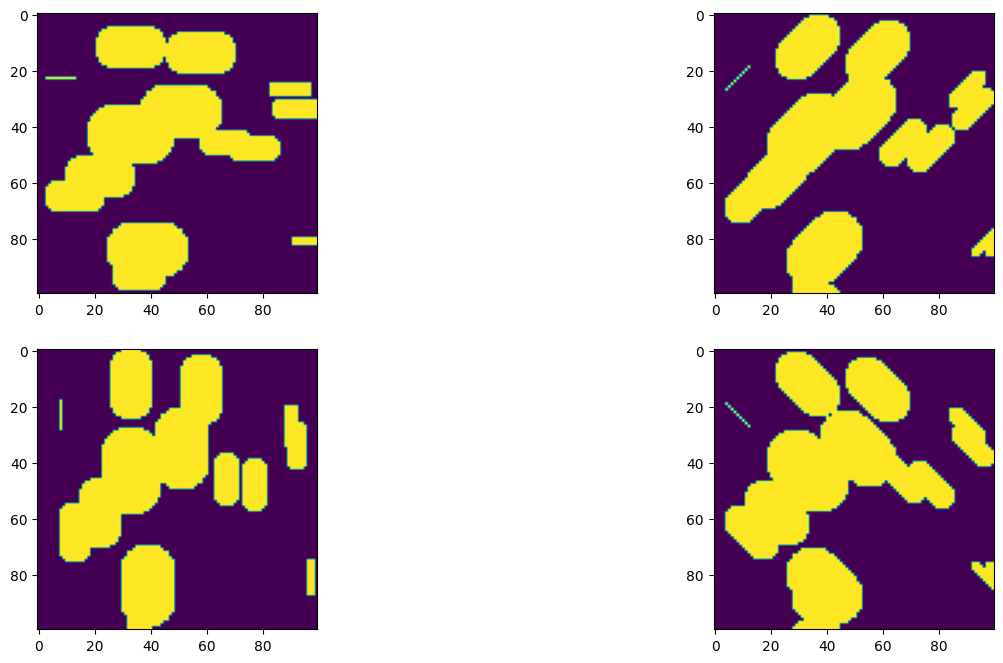

In [3]:
def normalize_image(img: np.ndarray, threshold: float = 0.1):
    """
    normalize the image to be between 0 and 1
    """
    dims = img.shape
    env = np.ones(dims)
    z = np.where(img < threshold)
    env[z] = 0.0
    return env

def c_space_plot(ax, env):
    ax.imshow(env)


c_list = []

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), layout=None)

for i in range(4):
    c_list.append(normalize_image(signal.convolve2d(data["environment"], data["rod"][:, :, i], boundary="symm", mode="same")))

k = 0
for ax in axs.flat:
    c_space_plot(ax, c_list[k])
    k += 1

In [4]:
def enqueue(p,
            config,
            cost,
           ):
    p.append((config, cost))
    return sorted(p, key=lambda tup: tup[1], reverse=True)

def dequeue(p
):
    #print("p in the def:", p)
    if not p:
        return None
    return p.pop()[0]

In [5]:
def returning(X_I,
              X_G, 
              dictionary,
             ):
    a = X_G
    b = 0
    s = [a]
    k = True
    while b != X_I:
        if k:
            b = a
            k = False
        b = dictionary[b][0]
        s.append(b)
    return s

In [12]:
def set_neighbours(
    q
) -> typing.List[typing.List[int]]:
    cost = 0
    neighbours = []
    if q[0] > 6 and c_list[q[2]][q[0]-1, q[1]] != 1:
            neighbours.append([q[0]-1, q[1], q[2], cost+1])
    if q[0] < 94 and c_list[q[2]][q[0]+1, q[1]] != 1:
            neighbours.append([q[0]+1, q[1], q[2], cost+1])
    if q[1] > 6 and c_list[q[2]][q[0], q[1]-1] != 1:
            neighbours.append([q[0], q[1]-1, q[2], cost+1])
    if q[1] < 94 and c_list[q[2]][q[0], q[1]+1] != 1:
            neighbours.append([q[0], q[1]+1, q[2], cost+1])

    for j in [(q[2] - 1) % 4, (q[2] + 1) % 4]:
        if c_list[j][q[0], q[1]] == 0:
            neighbours.append([q[0], q[1], j, cost+1])

    return neighbours

In [63]:
def A_star_algorithm(X_I,
                     X_G,
                    ):

    Q = []
    Q = enqueue(Q, X_I, 0)
    visited = np.zeros((100, 100, 4)) # 1 - visited, 0 - not visited 
    visited[X_I] = 1 
    queue = {X_I: (X_I, 0)} # state: (parent_state, C(state)) 
    states_visited = 0
    
    while Q:

        q = dequeue(Q)


        if q == X_G:
            return returning((6,6,2), (55,55,0), queue)

        for i in set_neighbours(q):
            c = (i[0], i[1], i[2])
            new_cost = queue[q][1] + i[3]           
            if visited[c] == 0:
                visited[c] = 1

                queue[c] = (q, new_cost)
                
                #norm_val = np.subtract([q[0], q[1]], [c[0], c[1]])
                h = np.linalg.norm([c[0], c[1]], ord=1)
                Q = enqueue(Q, c, new_cost+h)



            else:
                if queue[c][1] > new_cost:
                    queue[c] = (q, new_cost)

    return -1

In [64]:
X_I = (6, 6, 2)
X_G = (55, 55, 0)

result = A_star_algorithm(X_I, X_G)
result.reverse()
result = tuple(result)
result

((6, 6, 2),
 (6, 6, 3),
 (6, 6, 0),
 (6, 7, 0),
 (6, 8, 0),
 (6, 9, 0),
 (6, 10, 0),
 (7, 10, 0),
 (8, 10, 0),
 (8, 11, 0),
 (9, 11, 0),
 (9, 12, 0),
 (10, 12, 0),
 (10, 13, 0),
 (11, 13, 0),
 (11, 14, 0),
 (12, 14, 0),
 (12, 15, 0),
 (13, 15, 0),
 (13, 16, 0),
 (14, 16, 0),
 (14, 17, 0),
 (15, 17, 0),
 (15, 18, 0),
 (16, 18, 0),
 (16, 19, 0),
 (17, 19, 0),
 (17, 20, 0),
 (18, 20, 0),
 (18, 21, 0),
 (18, 22, 0),
 (19, 22, 0),
 (19, 23, 0),
 (19, 24, 0),
 (20, 24, 0),
 (20, 25, 0),
 (20, 26, 0),
 (20, 27, 0),
 (20, 28, 0),
 (20, 29, 0),
 (20, 30, 0),
 (20, 31, 0),
 (20, 32, 0),
 (20, 33, 0),
 (20, 34, 0),
 (20, 35, 0),
 (20, 36, 0),
 (20, 37, 0),
 (20, 38, 0),
 (20, 39, 0),
 (20, 40, 0),
 (20, 41, 0),
 (20, 42, 0),
 (20, 43, 0),
 (20, 44, 0),
 (20, 44, 3),
 (20, 45, 3),
 (20, 46, 3),
 (20, 47, 3),
 (20, 48, 3),
 (20, 49, 3),
 (20, 50, 3),
 (20, 51, 3),
 (20, 52, 3),
 (21, 52, 3),
 (21, 53, 3),
 (22, 53, 3),
 (22, 54, 3),
 (23, 54, 3),
 (23, 55, 3),
 (24, 55, 3),
 (24, 56, 3),
 (25, 56, 

MovieWriter ffmpeg unavailable; using Pillow instead.


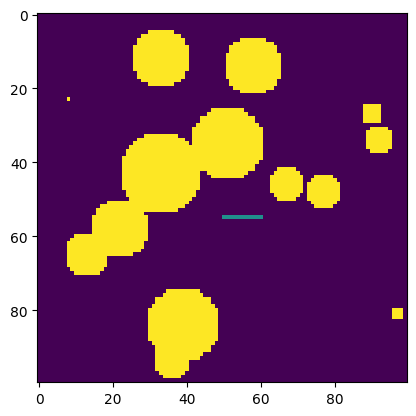

In [61]:
def plot_enviroment(img: np.ndarray, obj: np.ndarray, state: tuple):
    """
    @param img: original image in 2d
    @param obj: is the 3d array of different configurations
    @param state: is the current pose (x, y, orientation) of the object

    @return: the merged image
    """
    dims = obj.shape
    dim_x = int((dims[0] - 1) / 2)
    dim_y = int((dims[1] - 1) / 2)
    merged_img = np.copy(img)
    merged_img[state[0] - dim_x:state[0] + dim_x + 1, state[1] - dim_y:state[1] + dim_y + 1] += obj[:, :, state[2]] * 0.5
    return merged_img

def plotting_results(environment: np.ndarray, rod: np.ndarray, plan: list, save_path: str = 'rod_solve.gif'):
    """
    create an animation of the plan and save it to a file

    @param environment: the environment image in 2d
    @param rod: is the 3d array of different configuration
    @param plan: list of poses
    @param save_path: path to save the animation
    """

    fig = plt.figure()
    imgs = []

    for s in plan:
        im = plot_enviroment(environment, rod, s)
        plot = plt.imshow(im)
        imgs.append([plot])

    ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True)

    ani.save(save_path)

    plt.show()
    
plotting_results(data["environment"], data["rod"], result)

In [58]:
a = [0, 2]
b = [1, 0]
c = np.subtract(a, b)
c
np.linalg.norm(c)

2.23606797749979

In [66]:
a = [2, 2]
np.linalg.norm(a, ord=1)

4.0